<a href="https://colab.research.google.com/github/pradeepelavarasan/Number-Recognition-MNIST/blob/master/Number_Recognition_EIP4A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D

from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


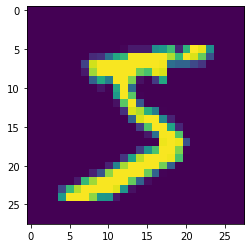

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Custom CNN Model

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, activation='relu', input_shape=(28,28,1), padding='same')) # output 26*26*32 ; Global RF 3*3
model.add(Convolution2D(64, 3, activation='relu', padding='same')) # output 24*24*64 ; Global RF 5*5
model.add(Convolution2D(128, 3, activation='relu', padding='same')) # output 22*22*128 ; Global RF 7*7
model.add(Convolution2D(256, 3, activation='relu', padding='same')) # output 20*20*256 ; Global RF 9*9
model.add(Convolution2D(512, 3, activation='relu', padding='same')) # output 18*18*512 ; Global RF 11*11  --acc 98.77
model.add(Convolution2D(32, 1, activation='relu')) # output 18*18*32 ; Global RF 11*11
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', data_format=None)) # output 9*9*32 ; Global RF 22*22
model.add(Convolution2D(64, 3, activation='relu', padding='same')) # output 24*24*64 ; Global RF 5*5
model.add(Convolution2D(128, 3, activation='relu', padding='same')) # output 22*22*128 ; Global RF 7*7
model.add(Convolution2D(256, 3, activation='relu', padding='same')) # output 20*20*256 ; Global RF 9*9
model.add(Convolution2D(512, 3, activation='relu', padding='same')) # output 18*18*512 ; Global RF 11*11  --acc 98.77
model.add(Convolution2D(10, 14))
model.add(Flatten())
model.add(Activation('softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 512)       1180160   
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 186s 3ms/step - loss: 0.1275 - acc: 0.9604
Epoch 2/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0480 - acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0346 - acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0274 - acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0231 - acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0201 - acc: 0.9937
Epoch 7/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0166 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0142 - acc: 0.9955
Epoch 9/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0132 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [21]:
print(score)

[0.03265566540587952, 0.992]


**Validation Accuracy of 99.2% !**